In [1]:
from data_loader.data_loaders import get_loader, MnistDataLoader
import os
import matplotlib.pyplot as plt
from model.model import U_Net
import torch 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary as summary

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
train_data_loader = get_loader(os.getcwd()+'/data', batch_size=16, mode='train')
valid_data_loader = get_loader(os.getcwd()+'/data', batch_size=16, mode='val')

In [3]:
for img ,mask in train_data_loader:
    print(img.shape)
    print(mask.shape)
    break

torch.Size([16, 3, 240, 240])
torch.Size([16, 240, 240])


In [8]:
model = U_Net().to(device)
#criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(list(model.parameters()), 1e-5)
									  

In [6]:
summary(model, (3,240,240))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 240, 240]           1,792
       BatchNorm2d-2         [-1, 64, 240, 240]             128
              ReLU-3         [-1, 64, 240, 240]               0
            Conv2d-4         [-1, 64, 240, 240]          36,928
       BatchNorm2d-5         [-1, 64, 240, 240]             128
              ReLU-6         [-1, 64, 240, 240]               0
        conv_block-7         [-1, 64, 240, 240]               0
         MaxPool2d-8         [-1, 64, 120, 120]               0
            Conv2d-9        [-1, 128, 120, 120]          73,856
      BatchNorm2d-10        [-1, 128, 120, 120]             256
             ReLU-11        [-1, 128, 120, 120]               0
           Conv2d-12        [-1, 128, 120, 120]         147,584
      BatchNorm2d-13        [-1, 128, 120, 120]             256
             ReLU-14        [-1, 128, 1

In [27]:
for epoch in range(50):
    r_loss = 0.0
    
    for i, data in enumerate(train_data_loader, 0):
        inputs, labels = data
        inputs = inputs.type('torch.FloatTensor')
        labels = labels.type('torch.FloatTensor')
        inputs = inputs.to(device)
        labels = labels.to(device) 

        optimizer.zero_grad() # gradient(변화도) 0으로 만들고
  
        # forward + backward + optimizer 최적화
        outputs = model(inputs)
       
        loss = criterion(outputs, labels) # loss 계산
        loss.backward() # 역전파
        optimizer.step()

        r_loss += loss.item()
        
        # if i % 100 == 99 :
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {r_loss / 2000:.3f}')
    running_loss = 0.0

print("finished")

KeyboardInterrupt: 

In [13]:
test_loader = get_loader('./data', mode='test', batch_size=10)

In [15]:
for i in test_loader:
    print(i[0].shape)
    break

torch.Size([10, 3, 240, 240])


In [17]:
for img, mask in test_loader:
    img = img.to(device)
    outputs = model(img)
    break

In [19]:
outputs[0, :,:,:].shape

torch.Size([1, 240, 240])

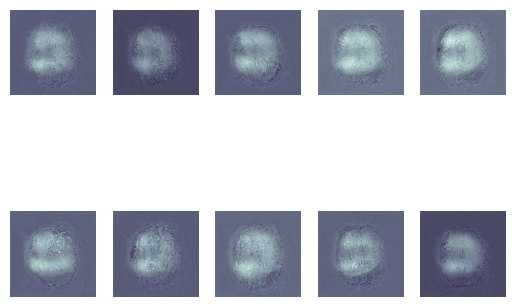

In [25]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = outputs[i, :, :, :].squeeze()
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()